# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [49]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [10]:
# Display a description of the dataset
display(data.describe())

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [231]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [ 1, 100, 375]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0   7057  9810     9568    1762              3293          1776
1  11594  7779    12144    3252              8035          3029
2   5841  1450     1162     597               476            70

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

Looking at the three sample customers, I would say customer 0 could be some type of small retailer considering its high values for the Milk and Grocery (both above or near the top quartile for their respective groups).

Looking at Customer 1 I would say it could be an retailer given the high values in Grocery, Detergents and Delicatessen (all in the top quartile in their respective groups).

Lastly, looking at Customer 2, I would say it could be a small resturate or market, considering low values across all categories except the Fresh (all in bottom quartile)

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [62]:
from sklearn.cross_validation import train_test_split
from sklearn import tree
from sklearn.metrics import r2_score


# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop('Milk', 1)
y_data = data['Milk'] 

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, y_data, test_size=0.25, random_state=12)

# TODO: Create a decision tree regressor and fit it to the training set
clf = tree.DecisionTreeRegressor(random_state= 2)
clf.fit(X_train, y_train)
regressor = clf.predict(X_test)

# TODO: Report the score of the prediction using the testing set
score = r2_score(y_test, regressor )
print score

0.111085829256


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**
The feature that I attempted to predict was 'Milk'. The prediction model produced a R^2 score of 0.11, which is relatively low, which determines that the remaining features values cannot predict Milk. Eventhough,this had a low R^2 score, this is a good thing that points to 'Milk' being an independent variable, which would help categorize customers.


### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

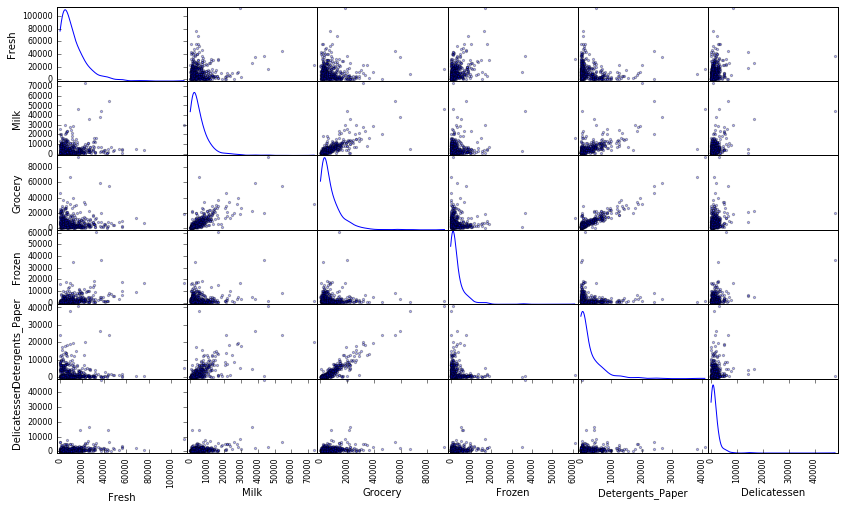

In [65]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [70]:
import matplotlib.pyplot as plt
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);


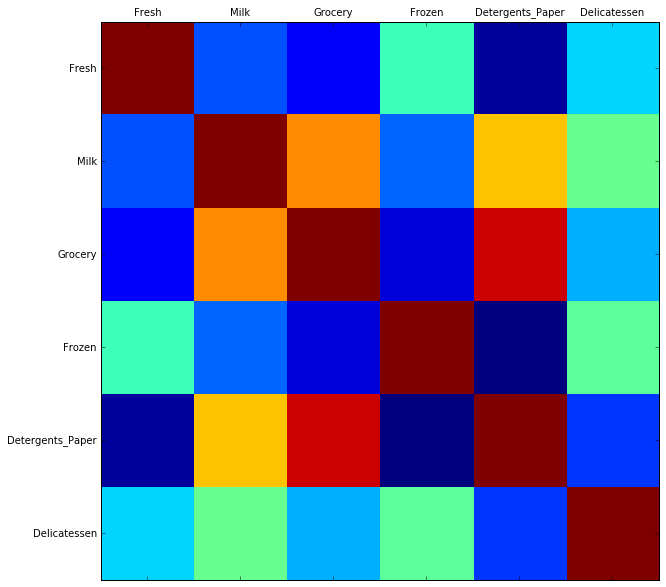

In [71]:
plot_corr(data)

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**
First just isolating on the 'Milk' feature, one could make the case that there is some correlation to the grocery feature, but not enough to prove that milk or grocery is not needed as a feature. The two features that do look highly correlated are Grocery and Detergents_Paper. 

Also, looking at each features density plot we see they are heavily skewed to the right, which we will address later in order to normalize the data set and make it more normally distributed.


## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

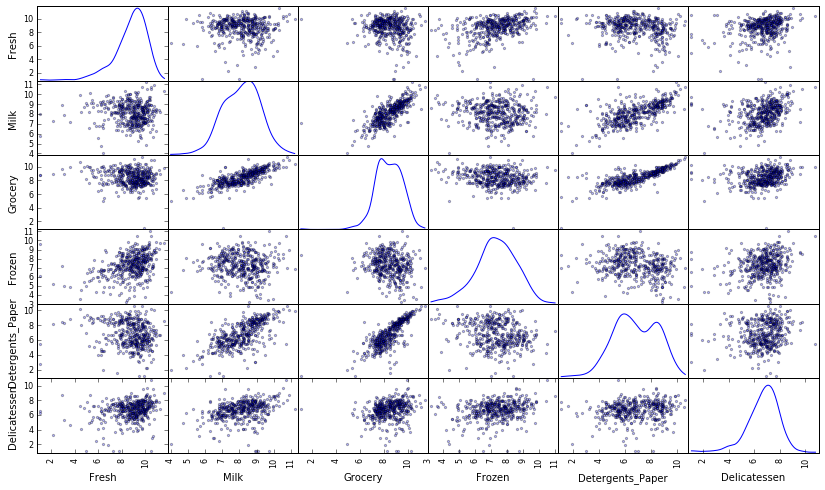

In [285]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [286]:
# Display the log-transformed sample data
display(log_samples)

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0  8.861775  9.191158  9.166179  7.474205          8.099554      7.482119
1  9.358243  8.959183  9.404590  8.087025          8.991562      8.015988
2  8.672657  7.279319  7.057898  6.391917          6.165418      4.248495

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [230]:
# For each feature find the data points with extreme high or low values
df_index = []
df_data = []

for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step =  1.5*(Q3-Q1)
    
    # OPTIONAL: Select the indices for data points you wish to remove
    df=log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    df_values = np.asarray(df.index.values)
    df_index.append(df_values)
    df_data.append(df)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    print "Q1='{}' Q3='{}'".format(Q1,Q3)
    print "Step='{}'".format(step)
    display(data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
################
# Remove the outliers, if any were specified
df_index = np.concatenate(df_index)
outliers =  pd.DataFrame(log_data.loc[df_index], columns = data.keys()).reset_index(drop = True)

#Find unique indexes/customers that had an outlier on more than one feature
df_indexf = pd.DataFrame(df_index)
df_indexf.columns = ['index']
df_indexf['freq'] = df_indexf.groupby('index')['index'].transform('count')
df_if=df_indexf.loc[df_indexf['freq'] >1]
df_unique =df_if['index'].unique()
print
print "customers who have an outlier on more than one feature" 
print df_unique

good_data = log_data.drop(log_data.index[df_unique]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':
Q1='8.04805870221' Q3='9.73706394795'
Step='2.53350786861'


Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
65      85  20959    45828      36             24231          1423
66       9   1534     7417     175              3468            27
81     219   9540    14403     283              7818           156
95       3   2920     6252     440               223           709
96      23   2616     8118     145              3874           217
128    140   8847     3823     142              1062             3
171    200  25862    19816     651              8773          6250
193    180   3485    20292     959              5618           666
218     18   7504    15205    1285              4797          6372
304    161   7460    24773     617             11783          2410
305    243  12939     8852     799              3909           211
338      3    333     7021   15601                15           550
353    117   6264    21203     228              8682          1111
355    190    727     2012     245               184           127
357     37   1275    22272     137              6747           110
412     97   3605    12400      98              2970            62

Data points considered outliers for the feature 'Milk':
Q1='7.33498124004' Q3='8.88048008859'
Step='2.31824827282'


Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
86   22925  73498    32114     987             20070           903
98     503    112      778     895                56           132
154    622     55      137      75                 7             8
356  22686    134      218    3157                 9           548

Data points considered outliers for the feature 'Grocery':
Q1='7.67461620137' Q3='9.27385367724'
Step='2.3988562138'


Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
75   20398  1137        3    4407                 3           975
154    622    55      137      75                 7             8

Data points considered outliers for the feature 'Frozen':
Q1='6.60967774917' Q3='8.17589608318'
Step='2.34932750101'


Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
38    4591  15729    16709      33              6956           433
57    5417   9933    10487      38              7572          1282
65      85  20959    45828      36             24231          1423
145  22039   8384    34792      42             12591          4430
175   2343   7845    11874      52              4196          1697
264   1073   9679    15445      61              5980          1265
325  32717  16784    13626   60869              1272          5609
420   4456   5266    13227      25              6818          1393
429   8607   1750     3580      47                84          2501
439   2787   1698     2510      65               477            52

Data points considered outliers for the feature 'Detergents_Paper':
Q1='5.54810142479' Q3='8.27434059875'
Step='4.08935876094'


Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
75   20398  1137        3    4407                 3           975
161  12434   540      283    1092                 3          2233

Data points considered outliers for the feature 'Delicatessen':
Q1='6.01187465693' Q3='7.50672842655'
Step='2.24228065442'


Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
66       9   1534     7417     175              3468            27
109   1406  16729    28986     673               836             3
128    140   8847     3823     142              1062             3
137   3087   8080     8282     661               721            36
142  37036   7152     8253    2995                20             3
154    622     55      137      75                 7             8
183  36847  43950    20170   36534               239         47943
184    327    918     4710      74               334            11
187   2438   8002     9819    6269              3459             3
203    583    685     2216     469               954            18
233    964   4984     3316     937               409             7
285  40254    640     3600    1042               436            18
289  42786    286      471    1388                32            22
343   1689   6964    26316    1456             15469            37


customers who have an outlier on more than one feature
[ 65  66 128 154  75]


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

Yes, the indexes/customers 65, 66, 128, 154, and 75 had outliers for more than one feature. These points were moved to the outliers list to be removed because their values were considered statisically out of range of the data set, which if included would create bias and add variablity in the model, decreasing the model's predictive accuracy.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

Dimension 1    0.4430
Dimension 2    0.7068
Dimension 3    0.8299
Dimension 4    0.9311
Dimension 5    0.9796
Dimension 6    1.0000
Name: Explained Variance, dtype: float64


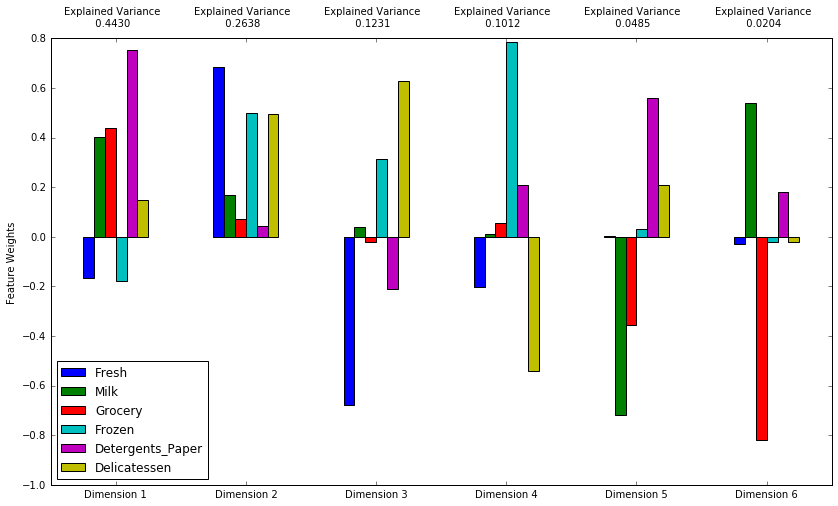

In [288]:
from sklearn.decomposition import PCA


# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA()
pca.fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

print pca_results['Explained Variance'].cumsum()

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**
The first and second principal component explain 0.7068 of the variance in the data. Then the first four principal components explain 0.9311 of the variance in the data.

Looking at the four dimensions and how they relate to customer spending and considering any category with  magnitude value of greater than 0.5 are highly correlated then we can say that Dimension 1 is highly correlated to high spending in the Detergents_Paper category, which realy seperate out the retailers in the data set. Next looking at Dimension 2 the Fresh category was given a high weight value, which would probably separate out the resturantes or markets in the data set. Then looking at Dimension 3 it was positivley weighted by Delicatessen, but negatively weighted by Fresh negatively high. This dimension could be seperating out cafe like customers. Lastly Dimension 4 is positively correlated with Frozen and negatively correlated with Delicatessen spending values. This dimension could be separating out. Here this dimension could be seperating out a certain type of market or retailer. 

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [289]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
0       1.7887       0.8123       0.2315      -0.0036      -0.1194   
1       2.3579       1.7393       0.2210       0.2840       0.5939   
2      -1.6159      -2.0080      -1.6401       0.3914       0.2127   

   Dimension 6  
0       0.2106  
1       0.0148  
2       0.6467

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [290]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = pca = PCA(n_components = 2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)


# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [291]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

Dimension 1  Dimension 2
0       1.7887       0.8123
1       2.3579       1.7393
2      -1.6159      -2.0080

## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

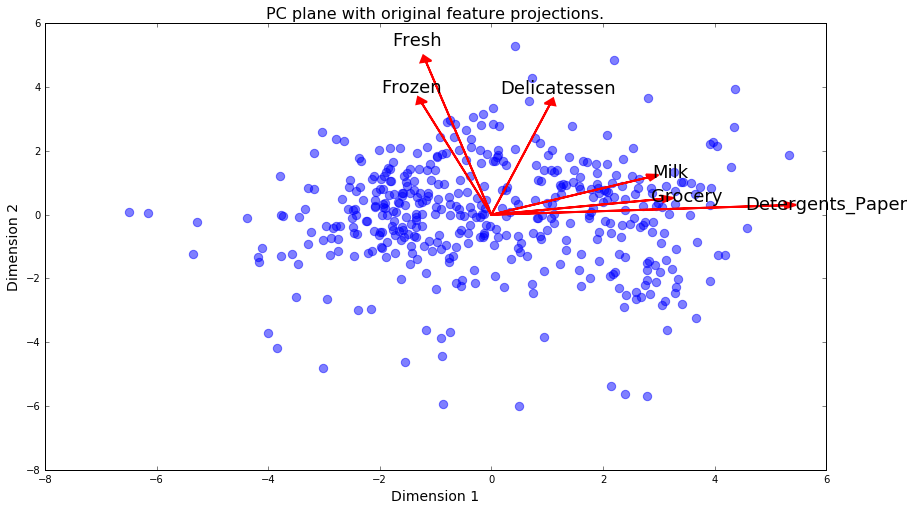

In [292]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

**Answer**
Milk, Grocery and Detergents_Paper are most strongly correlated with the first component and this cooresponds to the results from the PCA n_components = 6 results. Also, Frozen and Delicatessen were strong correlated with the second component, which corresponds to the original results of the PCA n_components = 6 

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**
The advantages of K-Means works relatively fast, can handle high number of data points and it works well on spherical clusters. And the advantages of using a Gaussian Mixture Model is the shape of the clusters matters alot less and also unlike K-Means where it performs hard clustering, GMM performs a soft clustering where an individual data point can be assigned to multiple clusters with probabilities.

Given the above after the use of PCA on the data set looks pretty spherical in shape and there isn't a major reason not to use K-Means ,so I will move forward in use the K-Means algorithm.




### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [293]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

score=[]
cluster_score = []
range_n_clusters = [2, 3, 4, 5, 6]

for  ii , n_clusters in enumerate(range_n_clusters):
    # TODO: Apply your clustering algorithm of choice to the reduced data 

    kmeans = KMeans(n_clusters=n_clusters, random_state=10).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = kmeans.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = kmeans.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    #sample_preds =kmeans.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score.append(silhouette_score(reduced_data, preds))
    
    cluster_score.append([n_clusters,score[ii]])

    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", score[ii])

#Find best number of clusters
cluster_df = pd.DataFrame(cluster_score, columns=['n_clusters', 'score'])

best_cluster = cluster_df['n_clusters'].loc[cluster_df['score'].idxmax()]
print
print "best # of clusters = {}".format(best_cluster)

# TODO: Apply your clustering algorithm of choice to the reduced data 
kmeans = KMeans(n_clusters=best_cluster, random_state=10).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = kmeans.predict(reduced_data)

# TODO: Find the cluster centers
centers = kmeans.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
sample_preds =kmeans.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score= silhouette_score(reduced_data, preds)
    


('For n_clusters =', 2, 'The average silhouette_score is :', 0.4262810154691084)
('For n_clusters =', 3, 'The average silhouette_score is :', 0.3903005387988206)
('For n_clusters =', 4, 'The average silhouette_score is :', 0.33293041968141934)
('For n_clusters =', 5, 'The average silhouette_score is :', 0.35220887435264298)
('For n_clusters =', 6, 'The average silhouette_score is :', 0.3645875258330768)

best # of clusters = 2


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**
Below are the scores for each cluster number that I have tried. 2 clusters resulted in the best silhouette score.


('For n_clusters =', 2, 'The average silhouette_score is :', 0.4262810154691084)
('For n_clusters =', 3, 'The average silhouette_score is :', 0.3903005387988206)
('For n_clusters =', 4, 'The average silhouette_score is :', 0.33293041968141934)
('For n_clusters =', 5, 'The average silhouette_score is :', 0.35220887435264298)
('For n_clusters =', 6, 'The average silhouette_score is :', 0.3645875258330768)

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

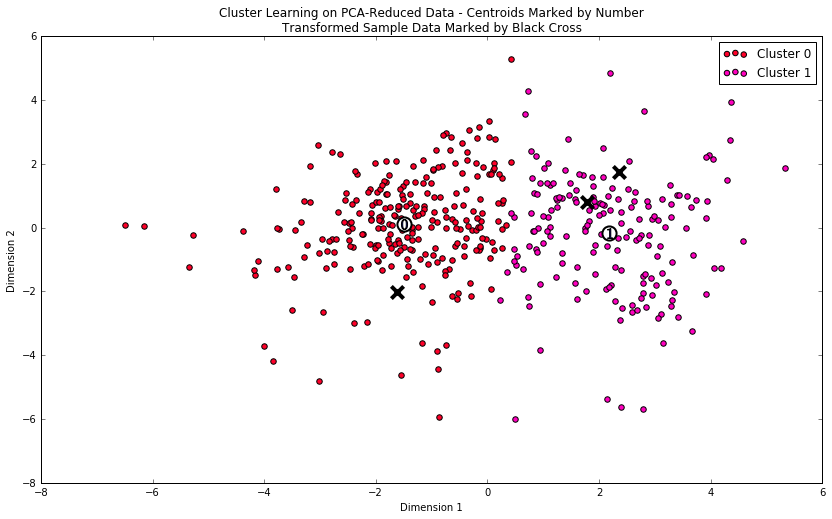

In [294]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [295]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

print
# Display a description of the dataset
display(data.describe())

Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0  8867.0  1897.0   2477.0  2088.0             294.0         681.0
Segment 1  4005.0  7900.0  12104.0   952.0            4561.0        1036.0

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**
Looking at segment 0 with its values in Fresh and Frozen above their reprentive median could be representive of small resturants, hotels, cafes or hotels. 

Looking at Segment 1 with its values above their representive median in all categories except Fresh and Frozen could represent customers that are various sized retailers.


### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [296]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred
print 
print samples

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0

   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0   7057  9810     9568    1762              3293          1776
1  11594  7779    12144    3252              8035          3029
2   5841  1450     1162     597               476            70


**Answer:**

Yes, the predicitons for each sample point are consistent with the customer segments from Question 8. When looking at the original sample values each customers data points match up nicely(i.e. within reasonable range) to their predicted  cluster center values.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
The wholesale distributor can use the customer segments to look at which customers use a relativley high amount of parishables i.e. Fresh, Milk and Delicatessen. The distributor can focus on segments that have higher amount in the previously mentioned categories where these customers would probably value higher turnover to have fresher products.

To run a successful A/B test, the A/B test can be run for each segment by can taking a control that has a certain number of customers that don't have their distribution service changed and a test sample where a certain number of custoemrs have their distribution service change from 5 to 3 days. Then it can be observed over a certain period of time if orders start to be cancelled or an increase of complaints occurs. If neither happens then we can say that there is strong probability that that entire segment would be good to have deliver service change from 5 to 3 days. 

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**
Since we already devised a supervised learner that being the kmeans algorithm which was already trained on our original customer data set, we can use that model to then predict/label which customer segment (i.e. 0 & 1) these new customers would fall under using the anticipated annual spending of each product category.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

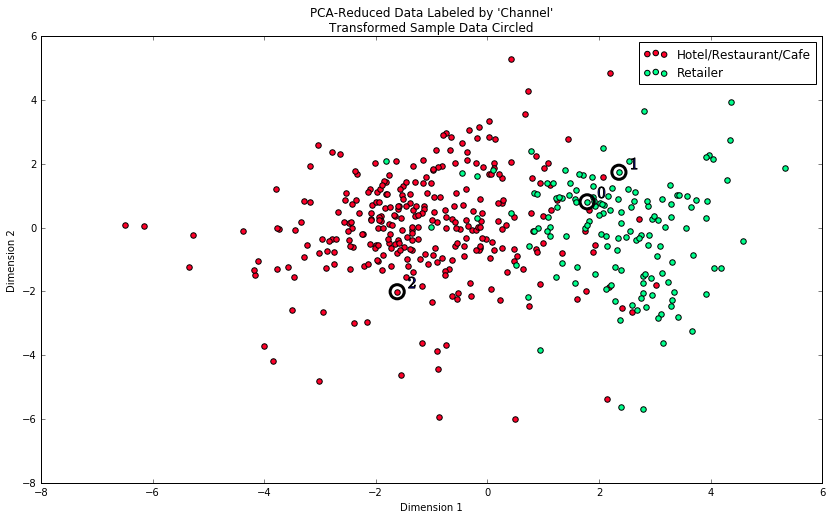

In [297]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, df_unique, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:** 
I think this custering algorithm and the number of clusters I've chosen match up very close to HoReCa and Retailer clusters. Looking at the two clusters  from my model, Cluster 0 fits in nicely to the HoReCa cluster and Cluster 1 fits nicely into the Retailer cluster. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.